<h2>$k$-Nearest Neighbors</h2>
<h3>Introduction:</h3>
<p>A $k$-nearest neighbors algorithm implementation that uses hand written number and face images data for training and testing </p>


**Libraries**:

In [1]:
import numpy as np
from scipy import stats

import sys
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

%matplotlib inline
import sys
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

%matplotlib inline

In [2]:
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.2




**Data:** The data resides in the files <code>faces.mat</code> and <code>digits.mat</code>.

<b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. To predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

Here's a function that loads the data set.

In [3]:
def loaddata(filename):
    """
    Returns xTr,yTr,xTe,yTe
    xTr, xTe are in the form nxd
    yTr, yTe are in the form nx1
    """
    data = loadmat(filename)
    xTr = data["xTr"]; # load in Training data
    yTr = np.round(data["yTr"]); # load in Training labels
    xTe = data["xTe"]; # load in Testing data
    yTe = np.round(data["yTe"]); # load in Testing labels
    return xTr.T,yTr.T,xTe.T,yTe.T

<h4> Visualizing data</h4>

The following script will take the first 10 training images from the face data set and visualize them.

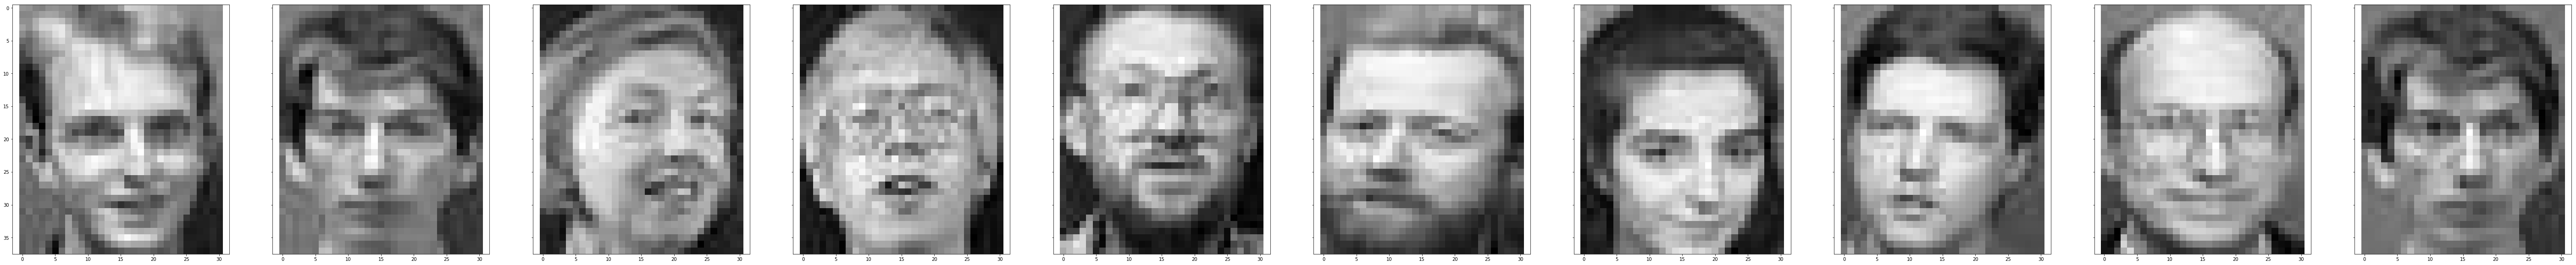

In [4]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")

def plotfaces(X, xdim=38, ydim=31, ):
    n, d = X.shape
    f, axarr = plt.subplots(1, n, sharey=True)
    f.set_figwidth(10 * n)
    f.set_figheight(n)
    
    if n > 1:
        for i in range(n):
            axarr[i].imshow(X[i, :].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)
    else:
        axarr.imshow(X[0, :].reshape(ydim, xdim).T, cmap=plt.cm.binary_r)
plotfaces(xTr[:10, :])


<h4> Implementation </h4>


<p> <b><code>l2distance</code></b> computes the euclidean distance between two points in the same $d$-dimensional feature space.
</p>

In [5]:
def l2distance(X,Z=None):
    # function D=l2distance(X,Z)
    #
    # Computes the Euclidean distance matrix.
    # Syntax:
    # D=l2distance(X,Z)
    # Input:
    # X: nxd data matrix with n vectors (rows) of dimensionality d
    # Z: mxd data matrix with m vectors (rows) of dimensionality d
    #
    # Output:
    # Matrix D of size nxm
    # D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    #
    # call with only one input:
    # l2distance(X)=l2distance(X,X)
    #

    if Z is None:
        """
        xx= np.sum(np.square(X),axis=1)[:,np.newaxis]
        zz= np.sum(np.square(X),axis=1)
        xz=np.inner(X,X)*-2 """
        #np.sqrt(np.maximum(0,xx+xz+zz))
        x_sum= np.sum(np.square(X),axis=1)
        return np.sqrt(np.maximum(0,x_sum[:,np.newaxis] -2*np.dot(X,X.T) + x_sum))
    else:  # case when there are two inputs (X,Z)
        """    
        xx= np.sum(np.square(X),axis=1)[:,np.newaxis]
        zz= np.sum(np.square(Z),axis=1)
        xz=np.inner(X,Z)*-2
        """
        #np.sqrt(np.maximum(0,xx+xz+zz))
            
        return np.sqrt(np.maximum(0,np.sum(np.square(X),axis=1)[:,np.newaxis] -2*np.dot(X,Z.T) + np.sum(np.square(Z),axis=1)) )
    


<p> <b><code>findknn</code></b> will find the $k$ nearest neighbors of a set of vectors within a given training data set, and return their array indices.
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
$I$ and $D$,are both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. 
<br>
The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
<br>
The matrix $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>

In [6]:
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    
    euc_dist= l2distance(xTr,xTe)
    #dists= np.sort(euc_dist,axis=0)[:k,:]
    #indices=np.argsort(euc_dist,axis=0)[:k,:]
    
    
    return np.argsort(euc_dist,axis=0)[:k,:], np.sort(euc_dist,axis=0)[:k,:]

We can visualize the 10 nearest training neighbors of some of the test points.

In [7]:
who = 4
k = 10
indices, dists = findknn(xTr,np.array(xTe[who,:], ndmin=2), k)

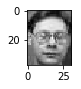

In [8]:
plotfaces(xTe[who,:].reshape(1,-1))

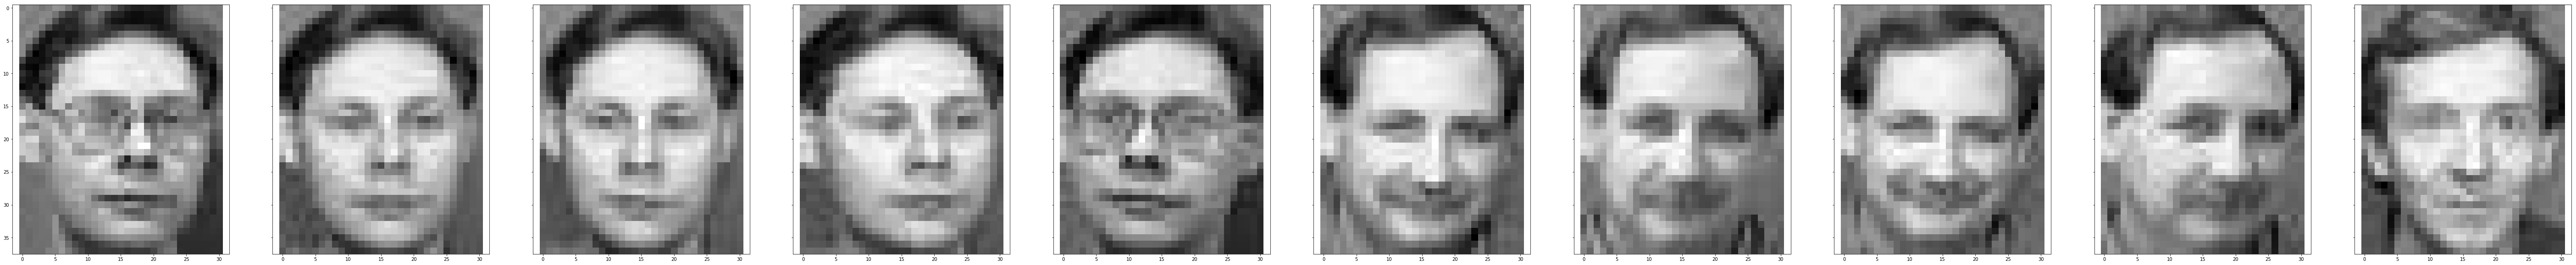

In [9]:
plotfaces(xTr[indices[:,0], :])


<b><code>knnclassifier</code></b>, will perform $k$ nearest neighbor classification on a given test data set. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
will output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

In [10]:
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    """  
    euc_dist= l2distance(xTr,xTe)
    
    indices= np.argsort(euc_dist,axis=0)
    nearest_indices= indices[:k,:]
    labels = yTr.take(nearest_indices)
    results = stats.mode(labels,axis=0)[0]
    return results.flatten()
    
    """
    return stats.mode(np.take(yTr,np.argsort(l2distance(xTr,xTe),axis=0)[:k,:]),axis=0)[0].flatten()
    

<p><b><code>analyze</code></b> will output the $accuracy$ or $absolute$ $loss$ in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.

</p>


In [11]:
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind='acc' classification error
    kind='abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()
    
  
    
    
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        return np.sum(np.abs(truth-preds))/(float(truth.size))
    elif kind == 'acc':
        return np.sum(truth==preds)/(float(truth.size))
    
    return output

<p>You can compute the actual classification error on the test set by calling
<pre>
analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>

<p>This script runs the $k$-nearest neighbor classifier over the faces and digits data set. The faces data set has $40$ classes, the digits data set $10$. </p>

In [12]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

print("Handwritten digits Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("digits.mat"); # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0092 seconds

Handwritten digits Recognition: (1-nn)
You obtained 95.02% classification acccuracy in 1.6967 seconds

